# Data Compression and Visualization using Principle Component Analysis (PCA) in Python


This project would focus on mapping high dimensional data to a lower dimensional space, a necessary step for projects that utilize data compression or data visualizations. As the ethical discussions surrounding AI continue to grow, scientists and businesses alike are using visualizations of high dimensional data to explain results.

During this project, we will perform K Means clustering on the well known Iris data set, which contains 3 classes of 50 instances each, where each class refers to a type of iris plant. To visualize the clusters, we will use principle component analysis (PCA) to reduce the number of features in the dataset.

We will cover:
* The KMeans Clustering Elbow Method
* Principle Component Analysis with Scikit-Learn
* Meshgrid Visualizations for PCA-reduced Data

Let's dive right in!

### 1. Import Libraries

First things first, let's ensure that we have all of the necessary libraries installed.

In [1]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('NumPy: {}'.format(np.__version__))
print('Scikit-learn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))

/home/prateek/venv/local/lib/python2.7/site-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/home/prateek/venv/local/lib/python2.7/site-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/home/prateek/venv/local/lib/python2.7/site-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import algos, lib
/home/prateek/venv/local/lib/python2.7/site-packages/pandas/core/util/hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import hashing, tslib
/home/prateek/venv/local/lib/python2.7/site-packages/pandas/core/indexe

Python: 2.7.12 (default, Dec  4 2017, 14:50:18) 
[GCC 5.4.0 20160609]
Pandas: 0.23.3
NumPy: 1.15.0
Scikit-learn: 0.19.2
Matplotlib: 2.2.3


### 2. Importing and Preprocessing the Iris Dataset

Due to it's common usage for pattern recognition tasks, the iris dataset is available directly through scikit-learn.  Furthermore, we will construct a Pandas DataFrame that provides descriptive statistics for the data set, as well as interesting visualizations such as a scatter matrix. 

In [2]:
from sklearn import datasets

# Load Dataset
iris = datasets.load_iris()
features = iris.data
target = iris.target

# generate Pandas DataFrame
df = pd.DataFrame(features)
df.columns = iris.feature_names

/home/prateek/venv/local/lib/python2.7/site-packages/sklearn/feature_extraction/hashing.py:10: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _hashing
/home/prateek/venv/local/lib/python2.7/site-packages/scipy/interpolate/_bsplines.py:10: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _bspl
/home/prateek/venv/local/lib/python2.7/site-packages/scipy/spatial/__init__.py:95: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .ckdtree import *
/home/prateek/venv/local/lib/python2.7/site-packages/scipy/spatial/__init__.py:96: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .qhull import *
/home/prateek/venv/local/lib/python2.7/site-packages/scipy/spatial/_spherical_voronoi.py:18: RuntimeWarning: numpy.dtype size changed, may indicate binary incom

In [3]:
# print target and target names
print target
iris.target_names

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


array(['setosa', 'versicolor', 'virginica'], dtype='|S10')

In [4]:
# print data set information
print df.shape
print df.head(20)

(150, 4)
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                 5.1               3.5                1.4               0.2
1                 4.9               3.0                1.4               0.2
2                 4.7               3.2                1.3               0.2
3                 4.6               3.1                1.5               0.2
4                 5.0               3.6                1.4               0.2
5                 5.4               3.9                1.7               0.4
6                 4.6               3.4                1.4               0.3
7                 5.0               3.4                1.5               0.2
8                 4.4               2.9                1.4               0.2
9                 4.9               3.1                1.5               0.1
10                5.4               3.7                1.5               0.2
11                4.8               3.4                1.6         

In [5]:
# print data set descriptions and class distributions
print df.describe()

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.198667  
std            0.763161  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [6]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# display scatter plot matrix
scatter_matrix(df)
plt.show()

<Figure size 640x480 with 16 Axes>

### 3. The Elbow Method

Since we already known that only three species of flowers are represented in this dataset, it's easy to predict the number of clusters we will need. However, what would we do if we didn't know this information? Since K-Means clustering is an unsupervised learning method, we often won't know the number of clusters necessary beforehand.  Fortunately, the elbow method is commonly used to determine the appropriate number of clusters for a dataset.  Let's use this method to confirm that three clusters is indeed the optimal value for this dataset. 

In [7]:
# KMeans Clustering - Elbow Method to Determine Optimal Number of Clusters
from sklearn.cluster import KMeans

# empty x and y data lists
X = []
Y = []

for i in range(1,31):
    # initialize and fit the kmeans model 
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    
    # append number of clusters to x data list
    X.append(i)
    
    # append average within-cluster sum of squares to y data list
    awcss = kmeans.inertia_ / df.shape[0]
    Y.append(awcss)

/home/prateek/venv/local/lib/python2.7/site-packages/sklearn/metrics/cluster/supervised.py:23: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .expected_mutual_info_fast import expected_mutual_information
/home/prateek/venv/local/lib/python2.7/site-packages/sklearn/metrics/pairwise.py:30: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .pairwise_fast import _chi2_kernel_fast, _sparse_manhattan
/home/prateek/venv/local/lib/python2.7/site-packages/sklearn/neighbors/__init__.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .ball_tree import BallTree
/home/prateek/venv/local/lib/python2.7/site-packages/sklearn/neighbors/__init__.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .kd_tree import KDTree
/home/prateek/venv/local/lib/python2.7/site-packages/

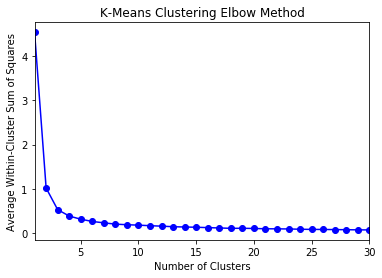

In [8]:
import matplotlib.pyplot as plt

# plot the x and y data
plt.plot(X,Y, 'bo-')
plt.xlim((1, 30))
plt.xlabel('Number of Clusters')
plt.ylabel('Average Within-Cluster Sum of Squares')
plt.title('K-Means Clustering Elbow Method')

# display the plot
plt.show()

### 4. Principle Component Analysis

From Wikipedia - principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.

Unless you have a heavy linear algebra background, it's easy to get lost in the eigenvectors and eigenvalues that PCA relies on.  Fortunately for us, scikit-learn makes implementing PCA easy and straight forward. In the cell below, we will perform a PCA reduction to reduce the number of features in our dataset to two. As a result of this reduction, we will be able to visualize each instance as an X,Y data point.

In [9]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

# perform principle component analysis
pca = PCA(n_components=2)
pc = pca.fit_transform(df)

# print new dimensions
print pc.shape
print pc[:10]

(150, 2)
[[-2.68420713  0.32660731]
 [-2.71539062 -0.16955685]
 [-2.88981954 -0.13734561]
 [-2.7464372  -0.31112432]
 [-2.72859298  0.33392456]
 [-2.27989736  0.74778271]
 [-2.82089068 -0.08210451]
 [-2.62648199  0.17040535]
 [-2.88795857 -0.57079803]
 [-2.67384469 -0.1066917 ]]


In [10]:
# re-fit kmeans model to principle components with appropriate number of clusters
kmeans = KMeans(n_clusters = 3)
kmeans.fit(pc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### 5. Visualization of PCA-reduced Data

Now that our data has been compressed, we can easily visualize it using matplotlib.pyplot. Furthermore, since our data has only two components, we can predict the appropriate cluster for each X, Y point in our plot and produce a color-coordinated meshgrid to display the different clusters in our K means algorithm.

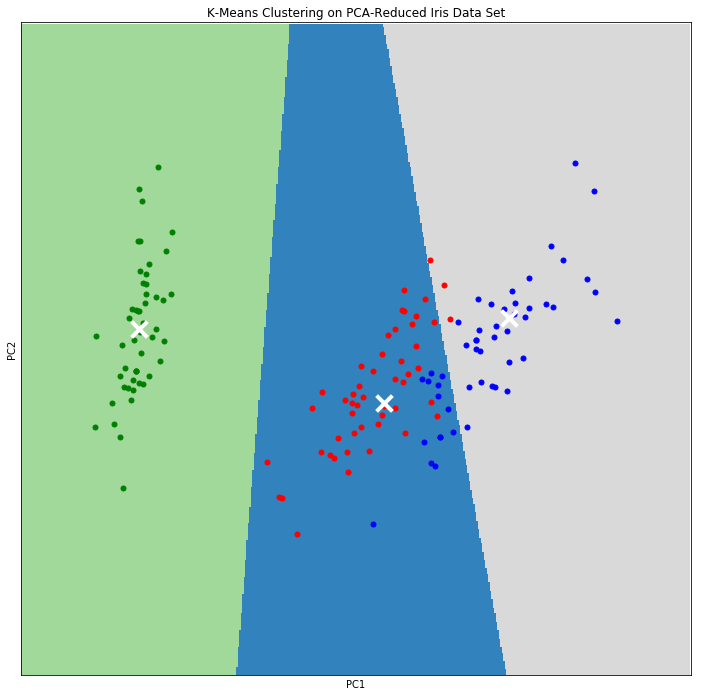

In [11]:
# Visualize high dimensional clusters using principle components

# set size for the mesh
h = 0.02 # determines quality of the mesh [x_min, x_max]x[y_min, y_max]

# generate mesh grid
x_min, x_max = pc[:, 0].min() - 1, pc[:, 0].max() + 1
y_min, y_max = pc[:, 1].min() - 1, pc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# label each point in mesh using last trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# generate color plot from results
Z = Z.reshape(xx.shape)
plt.figure(figsize = (12, 12))
plt.clf()
plt.imshow(Z, interpolation = 'nearest',
          extent = (xx.min(), xx.max(), yy.min(), yy.max()),
          cmap = plt.cm.tab20c,
          aspect = 'auto', origin = 'lower')

# plot the principle components on the color plot
for i, point in enumerate(pc):
    if target[i] == 0:
        plt.plot(point[0], point[1], 'g.', markersize = 10)
    if target[i] == 1:
        plt.plot(point[0], point[1], 'r.', markersize = 10)
    if target[i] == 2:
        plt.plot(point[0], point[1], 'b.', markersize = 10)

# plot the cluster centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 250, linewidth = 4,
           color = 'w', zorder = 10)

# set plot title and axis limits
plt.title('K-Means Clustering on PCA-Reduced Iris Data Set')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xticks(())
plt.yticks(())

# display the plot
plt.show()

### 6. Clustering Metrics

It looks good! But did the PCA reduction impact the performance of our K means clustering algorithm? Let's investigate by using some common clustering metrics, such as homogeneity, completeness, and V-measure. 

* Homogeneity - measures whether or not all of its clusters contain only data points which are members of a single class. 
* Completeness - measures whether or not all members of a given class are elements of the same cluster
* V-measure - the harmonic mean between homogeneity and completeness

In [12]:
from sklearn import metrics

# K Means clustering on Non Reduced Data
kmeans1 = KMeans(n_clusters = 3)
kmeans1.fit(features)

# K Means clustering on PCA Reduced Data
kmeans2 = KMeans(n_clusters = 3)
kmeans2.fit(pc)

# print metrics for Non reduced data 
print('Non Reduced Data')
print('Homogeneity: {}'.format(metrics.homogeneity_score(target, kmeans1.labels_)))
print('Completeness: {}'.format(metrics.completeness_score(target, kmeans1.labels_)))
print('V-measure: {}'.format(metrics.v_measure_score(target, kmeans1.labels_)))

# print metrics for PCA reduced data
print('Reduced Data')
print('Homogeneity: {}'.format(metrics.homogeneity_score(target, kmeans2.labels_)))
print('Completeness: {}'.format(metrics.completeness_score(target, kmeans2.labels_)))
print('V-measure: {}'.format(metrics.v_measure_score(target, kmeans2.labels_)))

Non Reduced Data
Homogeneity: 0.751485402199
Completeness: 0.764986151449
V-measure: 0.758175680006
Reduced Data
Homogeneity: 0.736419288125
Completeness: 0.74748658051
V-measure: 0.741911663182


In [13]:
# to compare results further, print out the actual labels
print kmeans1.labels_
print kmeans2.labels_
print target

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
